In [1]:
import sys
print(sys.executable)


c:\Users\Yosef Maregn\AppData\Local\Programs\Python\Python314\python.exe


In [4]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib statsmodels arviz notebook


'c:\Users\Yosef' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import sys
sys.executable


'c:\\Users\\Yosef Maregn\\AppData\\Local\\Programs\\Python\\Python314\\python.exe'

In [1]:
import sys
print(sys.executable)


c:\Users\Yosef Maregn\Desktop\brent-oil-change-point-analysis\.venv\Scripts\python.exe


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("All libraries are working!")


All libraries are working!


In [1]:
import seaborn
import pymc
import arviz

print("Everything works now!")


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
c:\Users\Yosef Maregn\AppData\Local\Programs\Python\Python314\Lib\site-packages\arviz\__init__.py:50: FutureWarning: 
ArviZ is undergoing a major refactor to improve flexibility and extensibility while maintaining a user-friendly interface.
Some upcoming changes may be backward incompatible.
For details and migration guidance, visit: https://python.arviz.org/en/latest/user_guide/migration_guide.html
  warn(


Everything works now!


In [3]:
import os

os.getcwd()


'c:\\Users\\Yosef Maregn\\Desktop\\brent-oil-change-point-analysis\\notebooks'

C:\Users\Yosef Maregn\AppData\Local\Temp\ipykernel_16248\532974040.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


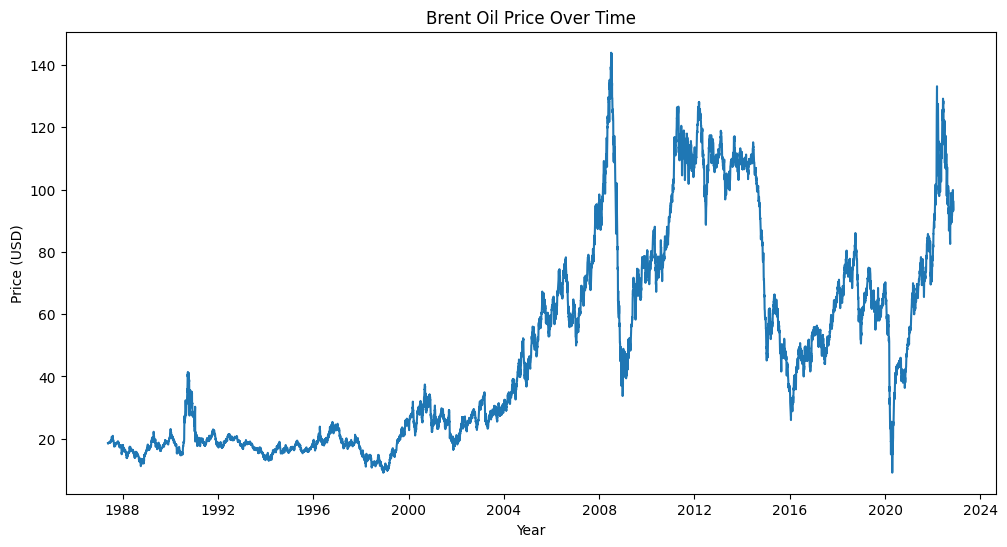

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file (go up one folder from notebooks)
df = pd.read_csv("../data/BrentOilPrices.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date just in case
df = df.sort_values('Date')

# Show first few rows
print(df.head())

# Plot Brent Oil Price over time
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Price', data=df)
plt.title("Brent Oil Price Over Time")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.show()


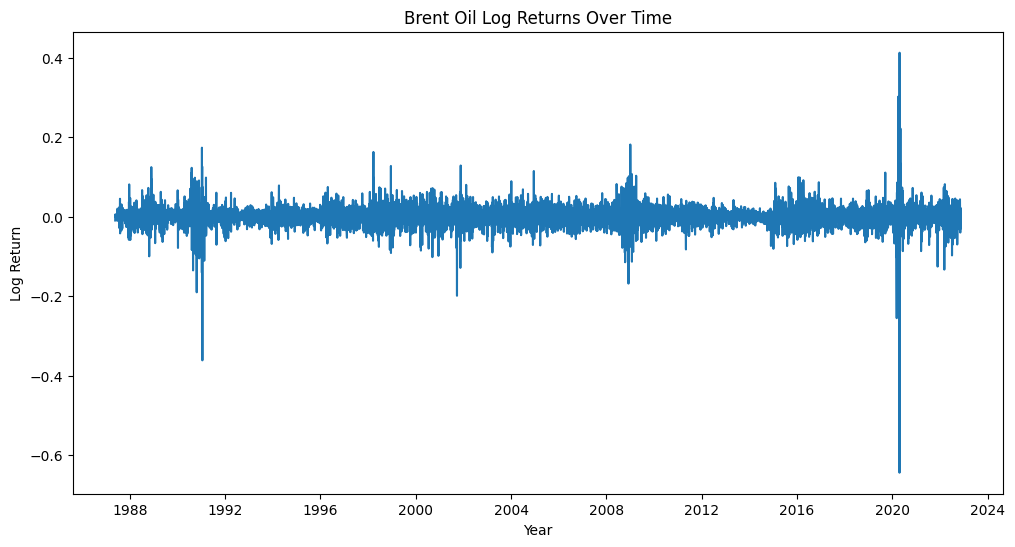

In [5]:
import numpy as np

# Compute log returns
df['LogReturn'] = np.log(df['Price']).diff()

# Drop the first row (NaN)
df = df.dropna()

# Quick plot to see volatility
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='LogReturn', data=df)
plt.title("Brent Oil Log Returns Over Time")
plt.xlabel("Year")
plt.ylabel("Log Return")
plt.show()


In [ ]:
import pymc as pm
import arviz as az

# Prepare the data
y = df['LogReturn'].values
n = len(y)

with pm.Model() as model:
    
    # Switch point: discrete uniform over all days
    tau = pm.DiscreteUniform('tau', lower=0, upper=n-1)
    
    # Means before and after tau
    mu1 = pm.Normal('mu1', mu=0, sigma=0.05)
    mu2 = pm.Normal('mu2', mu=0, sigma=0.05)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sigma=0.05)
    
    # Use switch function for mean
    mu = pm.math.switch(tau >= np.arange(n), mu1, mu2)
    
    # Likelihood
    obs = pm.Normal('obs', mu=mu, sigma=sigma, observed=y)
    
    # Sample
    trace = pm.sample(2000, tune=1000, target_accept=0.95, random_seed=42)


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu1, mu2, sigma]


c:\Users\Yosef Maregn\AppData\Local\Programs\Python\Python314\Lib\site-packages\rich\live.py:260: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\Yosef Maregn\AppData\Local\Temp\ipykernel_15988\2550031198.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


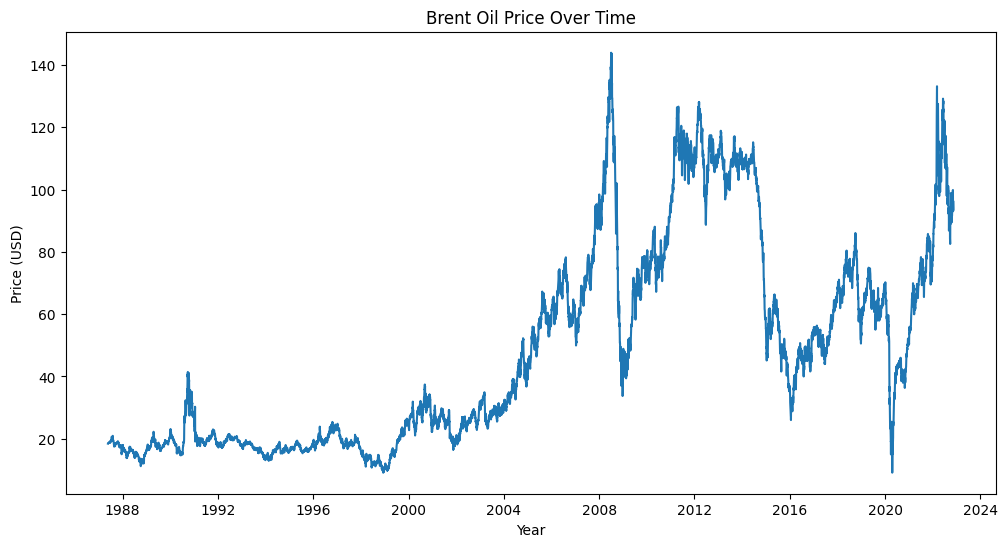

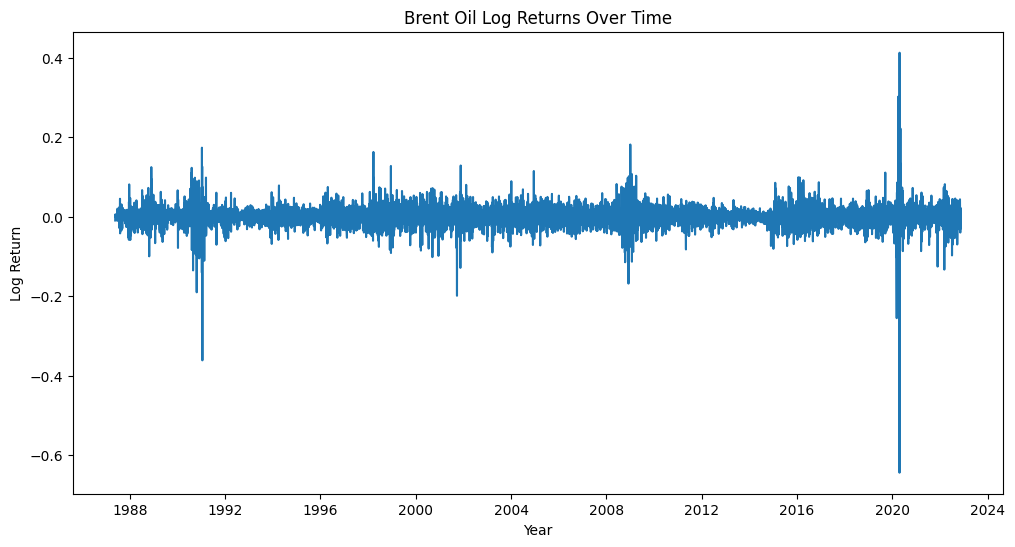

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu1, mu2, sigma]


c:\Users\Yosef Maregn\AppData\Local\Programs\Python\Python314\Lib\site-packages\rich\live.py:260: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

In [ ]:
# -------------------------------
# Brent Oil Price Analysis Notebook
# Fully Corrected & Ready-to-Run
# -------------------------------

# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az

# 2️⃣ Load the data
df = pd.read_csv("../data/BrentOilPrices.csv")  # Adjust path if needed
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')  # Ensure chronological order

# 3️⃣ Compute log returns for modeling
df['LogReturn'] = np.log(df['Price']).diff()
df = df.dropna()

# 4️⃣ Plot Brent Oil Price over time
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Price', data=df)
plt.title("Brent Oil Price Over Time")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.show()

# 5️⃣ Plot log returns to observe volatility
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='LogReturn', data=df)
plt.title("Brent Oil Log Returns Over Time")
plt.xlabel("Year")
plt.ylabel("Log Return")
plt.show()

# 6️⃣ Bayesian Change Point Analysis
y = df['LogReturn'].values
n = len(y)

with pm.Model() as model:
    # Discrete uniform prior for change point
    tau = pm.DiscreteUniform('tau', lower=0, upper=n-1)
    
    # Mean before and after change point
    mu1 = pm.Normal('mu1', mu=0, sigma=0.05)
    mu2 = pm.Normal('mu2', mu=0, sigma=0.05)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sigma=0.05)
    
    # Switch function for mean
    mu = pm.math.switch(np.arange(n) < tau, mu1, mu2)
    
    # Likelihood
    obs = pm.Normal('obs', mu=mu, sigma=sigma, observed=y)
    
    # Sample from posterior
    trace = pm.sample(2000, tune=1000, target_accept=0.95, random_seed=42)

# 7️⃣ Analyze the results
# Posterior summary
az.summary(trace, round_to=4)

# Trace plots
az.plot_trace(trace)
plt.show()

# 8️⃣ Map change point to date
tau_post = trace.posterior['tau'].values.flatten()
tau_most = int(np.median(tau_post))
change_date = df.iloc[tau_most]['Date']
print("Detected Change Point Date:", change_date)

# 9️⃣ Plot change point on the original price chart
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Price', data=df)
plt.axvline(x=change_date, color='red', linestyle='--', label=f'Change Point: {change_date.date()}')
plt.title("Brent Oil Price with Detected Change Point")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()
